#Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
import networkx as nx
from scipy.spatial import KDTree
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# Loading the dataset

In [2]:
credit_card_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/credit card detection/creditcard.csv")

#Data Exploration and Analysis

In [3]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# last 5 rows of the dataset
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
# dataset information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Checking the missing value in each column
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


<ipython-input-7-20de1725e51d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Class", data=credit_card_data, palette=["blue", "red"])


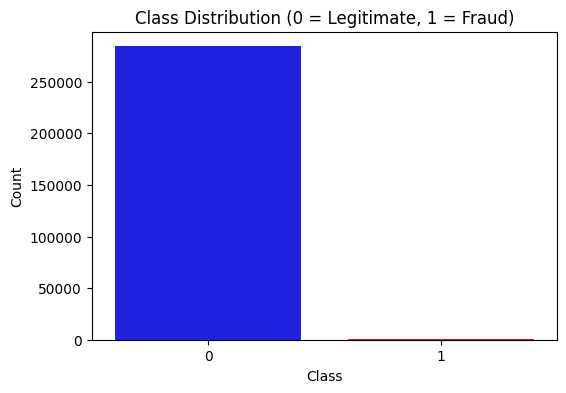

In [7]:
# Countplot of legit vs fraudulent transactions
plt.figure(figsize=(6, 4))
sns.countplot(x="Class", data=credit_card_data, palette=["blue", "red"])
plt.title("Class Distribution (0 = Legitimate, 1 = Fraud)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [8]:
# Display fraud percentage
fraud_percentage = credit_card_data["Class"].value_counts(normalize=True) * 100
fraud_percentage

,proportion
Class,
0,99.827251
1,0.172749


The dataset is highly imbalanced, with only 0.17% fraudulent transactions.

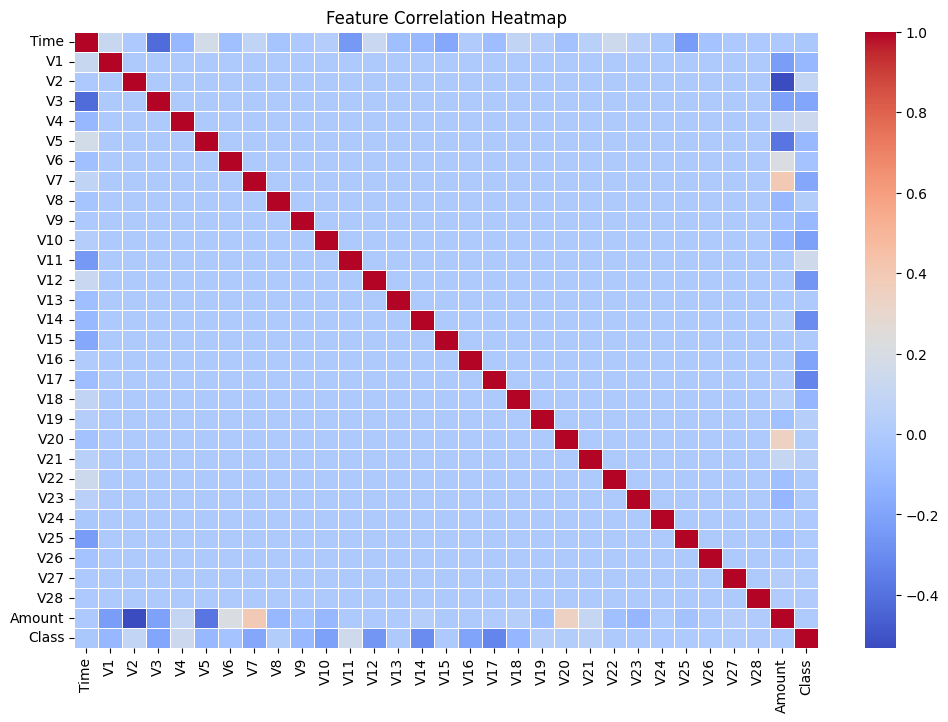

In [9]:
# Compute the correlation matrix
correlation_matrix = credit_card_data.corr()

# Plot a heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


<ipython-input-10-e90260dcf15e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="Amount", data=credit_card_data, palette="Set3")


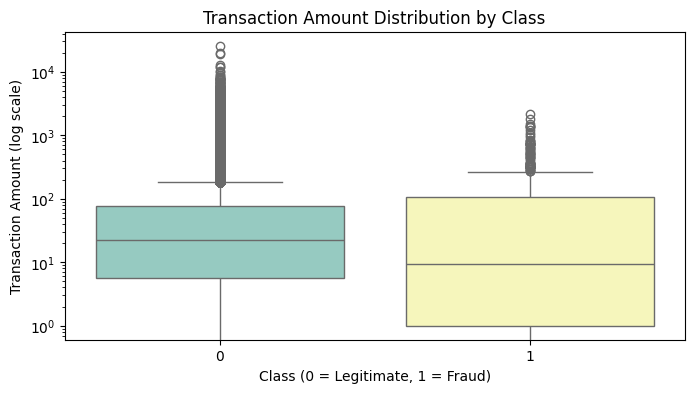

In [10]:
# Plot distribution of transaction amounts for fraud vs. non-fraud
plt.figure(figsize=(8, 4))
sns.boxplot(x="Class", y="Amount", data=credit_card_data, palette="Set3")
plt.yscale("log")  # Log scale to handle large amount differences
plt.title("Transaction Amount Distribution by Class")
plt.xlabel("Class (0 = Legitimate, 1 = Fraud)")
plt.ylabel("Transaction Amount (log scale)")
plt.show()

#Data preprocessing


In [11]:
# disribution of legit and fraudulent transaction
credit_card_data["Class"].value_counts()

,count
Class,
0,284315
1,492


In [12]:
# seperating the data for analysis

legit_transaction = credit_card_data[credit_card_data.Class == 0]
fraud_transaction = credit_card_data[credit_card_data.Class == 1]

print(legit_transaction.shape)
print(fraud_transaction.shape)


(284315, 31)
(492, 31)


In [13]:
# statistical measures for the data
print("Legit transaction statistical measure :")
legit_transaction.Amount.describe()

Legit transaction statistical measure :


,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [14]:
print("Fraudulent transaction statistical measure :")
fraud_transaction.Amount.describe()

Fraudulent transaction statistical measure :


,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [15]:
# compare the mean of the legit and fraudulent transaction
credit_card_data.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [16]:
scaler = StandardScaler()
credit_card_data[["Time","Amount"]] = scaler.fit_transform(credit_card_data[["Time","Amount"]])
X = credit_card_data.drop(columns=["Class"])
Y = credit_card_data["Class"]


In [17]:
# traing and testing the data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

# Model Training and Evaluation


1.   XGBoost Model




In [18]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", scale_pos_weight=578) # Model initialization
xgb_model.fit(X_train, Y_train) # train the model
y_pred_xgb = xgb_model.predict(X_test) # Make prediction
print("XGBoost Classification Report:\n", classification_report(Y_test, y_pred_xgb)) # Model Evaluation
print("XGBoost Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:44:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.86      0.87        98

    accuracy                           1.00     56962
   macro avg       0.94      0.93      0.94     56962
weighted avg       1.00      1.00      1.00     56962

XGBoost Confusion Matrix:
 [[56853    11]
 [   14    84]]



2.  Autoencoder Model




In [19]:
X_train_auto = X_train[Y_train == 0]  # Train only on non-fraud cases
input_dim = X_train_auto.shape[1]
autoencoder = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(14, activation="relu"),
    layers.Dense(input_dim, activation="sigmoid")
])
autoencoder.compile(optimizer="adam", loss="mse")
autoencoder.fit(X_train_auto, X_train_auto, epochs=10, batch_size=256, shuffle=True, validation_split=0.1, verbose=1)
X_test_pred = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - X_test_pred, 2), axis=1)
y_pred_auto = (mse > np.percentile(mse, 95)).astype(int)
print("Autoencoder AUC Score:", roc_auc_score(Y_test, y_pred_auto))


Epoch 1/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.0768 - val_loss: 0.8206
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8274 - val_loss: 0.7806
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8014 - val_loss: 0.7639
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7873 - val_loss: 0.7524
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7699 - val_loss: 0.7457
Epoch 6/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7620 - val_loss: 0.7413
Epoch 7/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7566 - val_loss: 0.7378
Epoch 8/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7534 - val_loss: 0.7355
Epoch 9/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7675 - val_loss: 0.7342
Epoch 10/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7553 - val_loss: 0.7330
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Autoencoder AUC Score: 0.924702368989239


3. Graph based Analysis

In [20]:
credit_card_data_sample = credit_card_data.sample(n=5000, random_state=42)
G = nx.Graph()
for index, row in credit_card_data_sample.iterrows():
    G.add_node(index, amount=row["Amount"], label=row["Class"])
amounts = credit_card_data_sample["Amount"].values.reshape(-1, 1)
tree = KDTree(amounts)
threshold = 10  # Transactions within $10 of each other
for i, amount in enumerate(amounts):
    indices = tree.query_ball_point(amount, threshold)
    for j in indices:
        if i != j:
            G.add_edge(credit_card_data_sample.index[i], credit_card_data_sample.index[j])
print("Graph Nodes:", G.number_of_nodes(), "Edges:", G.number_of_edges())


Graph Nodes: 5000 Edges: 12463407
